In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, ConcatDataset

import matplotlib.pyplot as plt

### Paths

In [2]:
ls data

FER-2013/ JAFFE/    KDEF/


In [3]:
kdef_dir = 'data/KDEF'
fer_train = 'data/FER-2013/train'
fer_test = 'data/FER-2013/test'

### Define transformations

In [4]:
transform = transforms.Compose([
    transforms.CenterCrop((600, 600)),
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),  
    transforms.ToTensor()           
])

transform2 = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()          
])



данные загружаются в объект dataset. Это специальный объект PyTorch, который является подклассом torch.utils.data.Dataset. Он организует ваши данные и обеспечивает доступ к ним в виде пар (изображение, метка). Однако сами изображения не загружаются в память сразу — они загружаются по мере необходимости, когда вы итерируетесь по DataLoader.

### Create dataset using ImageFolder

In [5]:
fer_train = datasets.ImageFolder(root=fer_train, transform=transform2)
fer_test = datasets.ImageFolder(root=fer_test, transform=transform2)

fer_dataset = ConcatDataset([fer_train, fer_test])
kdef_dataset = datasets.ImageFolder(root=kdef_dir, transform=transform)


dataset = ConcatDataset([kdef_dataset, fer_dataset])

In [16]:
fer_dataset[0][0].shape

torch.Size([1, 128, 128])

In [9]:
len(kdef_dataset)

2938

In [10]:
len(dataset)

38825

In [6]:
classes = kdef_dataset.classes
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
fer_train.classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

### Split the data into train, val, test

In [8]:
# define sizes of train, val and test
train_size = int(0.7 * len(dataset))  # 70% for train
val_size = int(0.15 * len(dataset))   # 15% for validation
test_size = len(dataset) - train_size - val_size  # rest for testing

# splitting dataset into train, val, test
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader for each part
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [9]:
print(train_size, test_size, val_size)

27177 5825 5823


In [26]:
def show_img(loader):

    data_iter = iter(train_loader)
    images, labels = next(data_iter)
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,8))

    for i, image in enumerate(images[:5]):
        ax[i].imshow(image[0],cmap='gray')
        ax[i].set_title(classes[labels[i]])
        ax[i].axis('off')
    

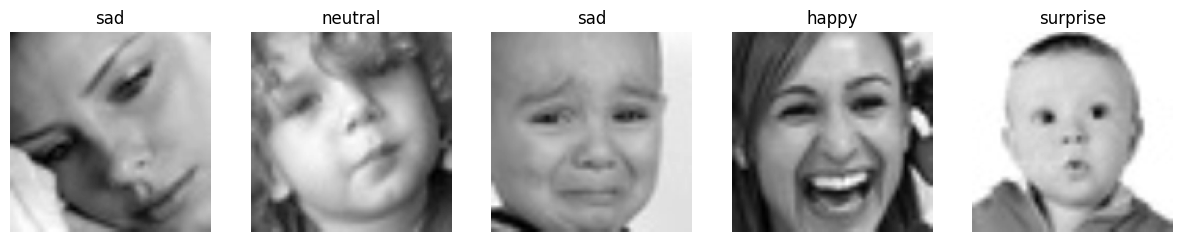

In [27]:
show_img(train_loader)

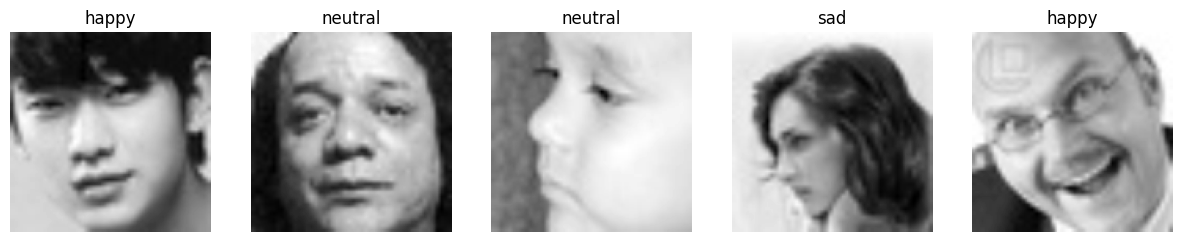

In [28]:
show_img(val_loader)

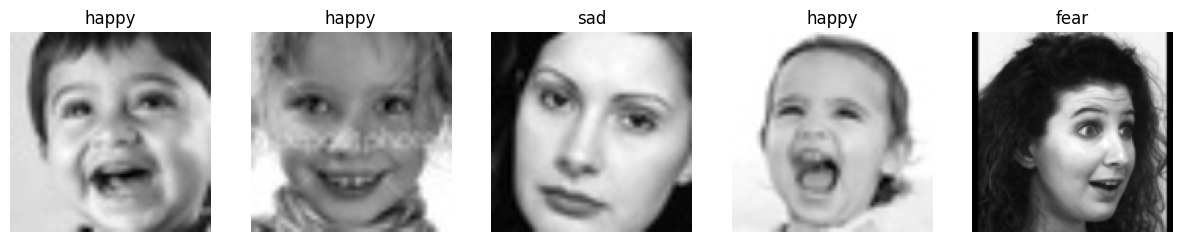

In [29]:
show_img(test_loader)

In [19]:
from collections import Counter


# Get the class indices for each image in the dataset
class_counts = Counter([label for _, label in dataset])

# Get the class names from the dataset
class_names = fer_train.classes

# Print the class balance
for class_idx, count in class_counts.items():
    print(f"Class '{class_names[class_idx]}': {count} images")


Class 'angry': 5373 images
Class 'disgust': 967 images
Class 'fear': 5541 images
Class 'happy': 9409 images
Class 'neutral': 6618 images
Class 'sad': 6496 images
Class 'surprise': 4421 images


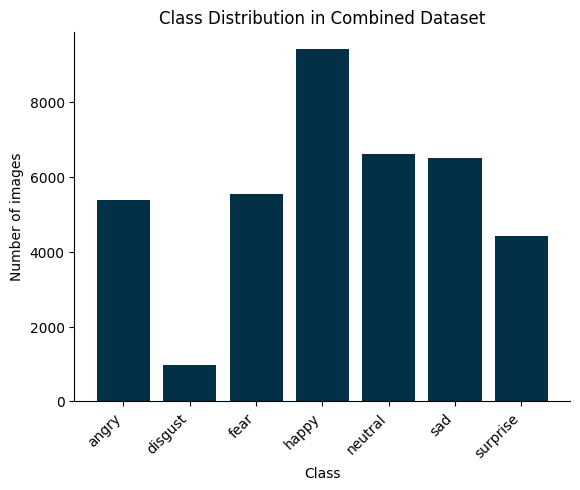

In [29]:
fig, ax = plt.subplots()
ax.bar(class_names, class_counts.values(), color='#023047')
ax.set_xlabel('Class')
ax.set_ylabel('Number of images')
ax.set_title('Class Distribution in Combined Dataset')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45, ha='right')
ax.spines[['top','right']].set_visible(False)
plt.show()
